In [22]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
with open('Scrapped_1_243.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

,text,date,attribute
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...","Jan 3, 2025","[No offer, Positive experience, Difficult inte..."
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...","Jan 3, 2025","[No offer, Positive experience, Difficult inte..."
2,"[I interviewed at NVIDIA in 1/2/2025, In total...","Jan 2, 2025","[No offer, Negative experience, Easy interview]"
3,"[I interviewed at NVIDIA in 1/2/2025, In total...","Jan 2, 2025","[No offer, Negative experience, Easy interview]"
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...","Dec 31, 2024","[Accepted offer, Positive experience, Average ..."
...,...,...,...
4855,[I applied through college or university. The ...,"Dec 21, 2009","[Accepted offer, Positive experience, Easy int..."
4856,[I applied through a recruiter. The process to...,"Sep 24, 2009","[Accepted offer, Neutral experience, Average i..."
4857,[I applied through a recruiter. The process to...,"Sep 24, 2009","[Accepted offer, Neutral experience, Average i..."
4858,[I applied through an employee referral. The p...,"Mar 29, 2009","[Accepted offer, Positive experience, Difficul..."


In [2]:
# Split the 'attribute' column into 3 separate columns
df[['Offer', 'Experience', 'Level']] = pd.DataFrame(df['attribute'].tolist(), index=df.index)

# Drop the original 'attribute' column and 'date' column
df = df.drop(columns=['attribute'])
df=df.drop('date', axis=1)

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No offer,Positive experience,Difficult interview
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No offer,Positive experience,Difficult interview
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No offer,Negative experience,Easy interview
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No offer,Negative experience,Easy interview
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Accepted offer,Positive experience,Average interview
...,...,...,...,...
4855,[I applied through college or university. The ...,Accepted offer,Positive experience,Easy interview
4856,[I applied through a recruiter. The process to...,Accepted offer,Neutral experience,Average interview
4857,[I applied through a recruiter. The process to...,Accepted offer,Neutral experience,Average interview
4858,[I applied through an employee referral. The p...,Accepted offer,Positive experience,Difficult interview


In [ ]:
# Remove keywords 'offer', 'experience', and 'interview' from attribute columns
keywords_to_remove = ['offer', 'experience', 'interview']
for col in ['Offer', 'Experience', 'Level']:
    for keyword in keywords_to_remove:
        df[col] = df[col].str.replace(keyword, '', regex=False).str.strip()

df['Offer'] = df['Offer'].replace({'Accepted': 'Yes', 'Declined': 'Yes'})

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [7]:
df = df.reset_index(drop=True)

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [ ]:
df = df.dropna()

In [9]:
df = df[df['text'] != 'NA']
df = df[df['Offer'] != 'NA']
df = df[df['Experience'] != 'NA']
df = df[df['Level'] != 'NA']
df

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [10]:
df.to_json('NVidia_Interview_data.json')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
with open('NVidia_Interview_data.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df = df.reset_index(drop=True)
df

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4579,[I applied through college or university. The ...,Yes,Positive,Easy
4580,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4581,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4582,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [14]:
%pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 33.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess a single text string
def preprocess_text(text):
    # Handle None values
    if text is None:
        return ""  # Return an empty string or any placeholder you prefer

    # Remove punctuation using translate
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove words with 1 or 2 characters (optional)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to each string in the 'text' column
def preprocess_text_list(text_list):
    if text_list is None:
        return []  # Return an empty list if the input is None
    return [preprocess_text(text) for text in text_list]

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text_list)

# Transform 'Offer' column (if it exists)
df['Offer'] = df['Offer'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_2465/2681575782.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Offer'] = df['Offer'].replace({'Yes': 1, 'No': 0})


,text,Offer,Experience,Level
0,"[interviewed nvidia santa clara 132025, length...",0,Positive,Difficult
1,"[interviewed nvidia santa clara 132025, length...",0,Positive,Difficult
2,"[interviewed nvidia 122025, total three interv...",0,Negative,Easy
3,"[interviewed nvidia 122025, total three interv...",0,Negative,Easy
4,"[interviewed nvidia 12312024, talk network alg...",1,Positive,Average
...,...,...,...,...
4579,[applied college university process took dayi ...,1,Positive,Easy
4580,[applied recruiter process took weeki intervie...,1,Neutral,Average
4581,[applied recruiter process took weeki intervie...,1,Neutral,Average
4582,[applied employee referral process took weeksi...,1,Positive,Difficult


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'Experience', 'Level']], df['Offer'], test_size=0.2)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['text'].apply(lambda x: ' '.join(x)))
X_test_text = vectorizer.transform(X_test['text'].apply(lambda x: ' '.join(x)))

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(X_train[['Experience', 'Level']])
X_test_cat = encoder.transform(X_test[['Experience', 'Level']])

X_train = pd.concat([pd.DataFrame(X_train_text.toarray()), pd.DataFrame(X_train_cat.toarray())], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_text.toarray()), pd.DataFrame(X_test_cat.toarray())], axis=1)

### We used Logistic Regression, Random Forest Regressor, SVM, XGBoost, ABA Boost, KNN, Decision Tree etc along with GridSearchCV and RandomizedSearchCV for hyperparameter tuning.
### In the end, Logistic Regression gives us the best result with an Accuracy of 95% and an F1 Score of 0.92.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8495092693565977
Precision: 0.8883928571428571
Recall: 0.6378205128205128
F1 Score: 0.7425373134328358


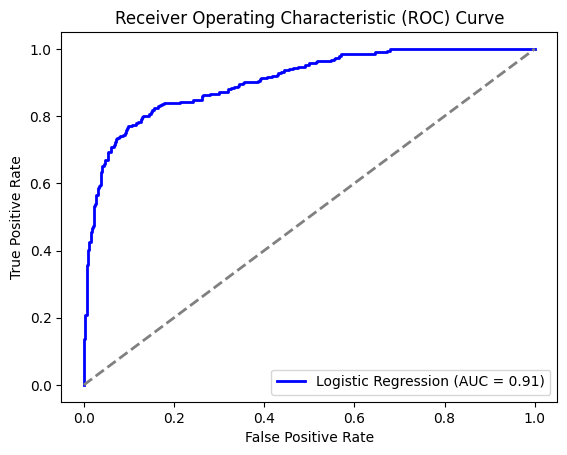

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression Accuracy: 0.8495092693565977
Confusion Matrix:
 [[580  25]
 [113 199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       605
           1       0.89      0.64      0.74       312

    accuracy                           0.85       917
   macro avg       0.86      0.80      0.82       917
weighted avg       0.85      0.85      0.84       917



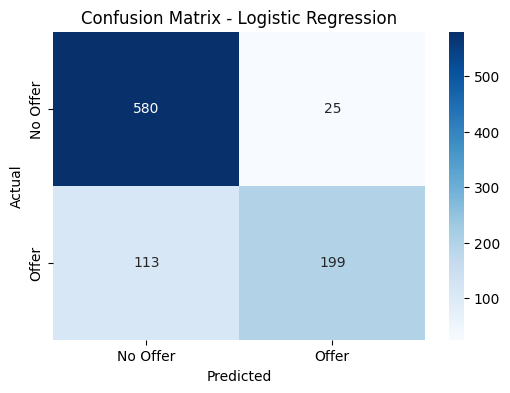

In [33]:
# Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", class_report_logreg)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)

# Plot Confusion Matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Accuracy: 0.7742639040348964
Confusion Matrix:
 [[527  78]
 [129 183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       605
           1       0.70      0.59      0.64       312

    accuracy                           0.77       917
   macro avg       0.75      0.73      0.74       917
weighted avg       0.77      0.77      0.77       917



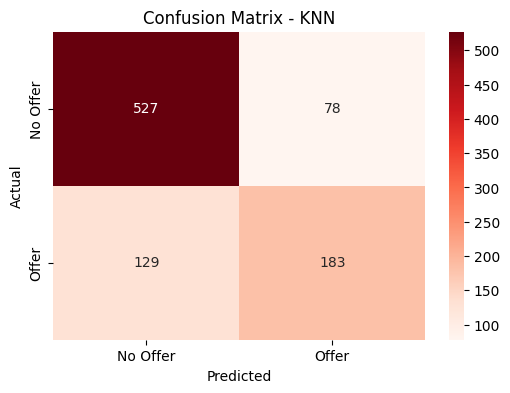

In [34]:
# K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

# Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Classifier

Random Forest Accuracy: 0.9498364231188658
Confusion Matrix:
 [[605   0]
 [ 46 266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       605
           1       1.00      0.85      0.92       312

    accuracy                           0.95       917
   macro avg       0.96      0.93      0.94       917
weighted avg       0.95      0.95      0.95       917



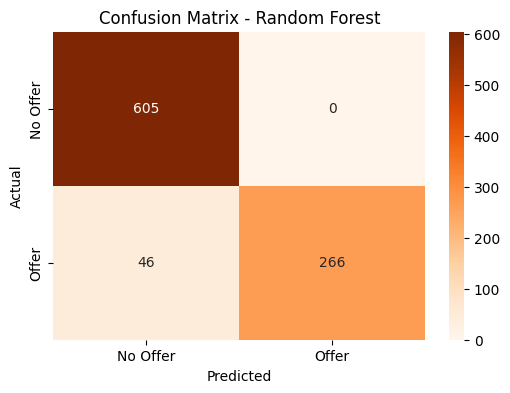

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.894460449572694
Best Random Forest Accuracy: 0.945474372955289
Confusion Matrix:
 [[601   4]
 [ 46 266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       605
           1       0.99      0.85      0.91       312

    accuracy                           0.95       917
   macro avg       0.96      0.92      0.94       917
weighted avg       0.95      0.95      0.94       917



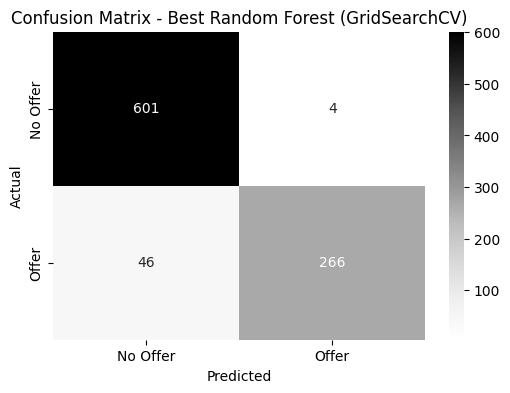

In [29]:
# GridSearchCV for Hyperparameter Tuning (using Random Forest as an example)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model from GridSearchCV
best_rf_classifier = grid_search.best_estimator_
y_pred_best_rf = best_rf_classifier.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

print("Best Random Forest Accuracy:", accuracy_best_rf)
print("Confusion Matrix:\n", conf_matrix_best_rf)
print("Classification Report:\n", class_report_best_rf)

# Plot Confusion Matrix for Best Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Greys', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - Best Random Forest (GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ADA Boost Classifier

AdaBoost Accuracy: 0.7241003271537623
Confusion Matrix:
 [[546  59]
 [194 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       605
           1       0.67      0.38      0.48       312

    accuracy                           0.72       917
   macro avg       0.70      0.64      0.65       917
weighted avg       0.71      0.72      0.70       917



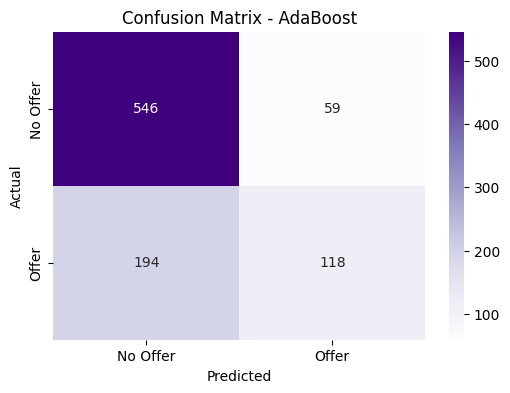

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

print("AdaBoost Accuracy:", accuracy_ada)
print("Confusion Matrix:\n", conf_matrix_ada)
print("Classification Report:\n", class_report_ada)

# Plot Confusion Matrix for AdaBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Purples', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naive Bayes Accuracy: 0.7066521264994547
Confusion Matrix:
 [[604   1]
 [268  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       605
           1       0.98      0.14      0.25       312

    accuracy                           0.71       917
   macro avg       0.84      0.57      0.53       917
weighted avg       0.79      0.71      0.62       917



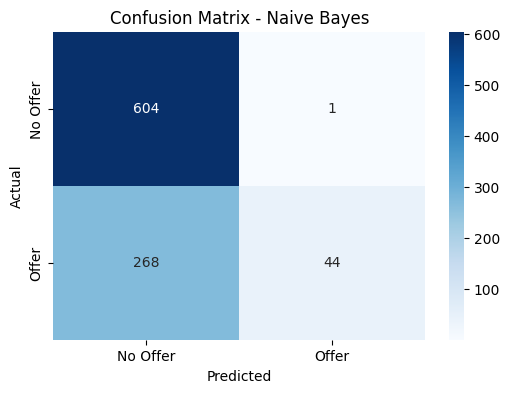

In [25]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", class_report_nb)

# Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.945474372955289
Confusion Matrix:
 [[583  22]
 [ 28 284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       605
           1       0.93      0.91      0.92       312

    accuracy                           0.95       917
   macro avg       0.94      0.94      0.94       917
weighted avg       0.95      0.95      0.95       917



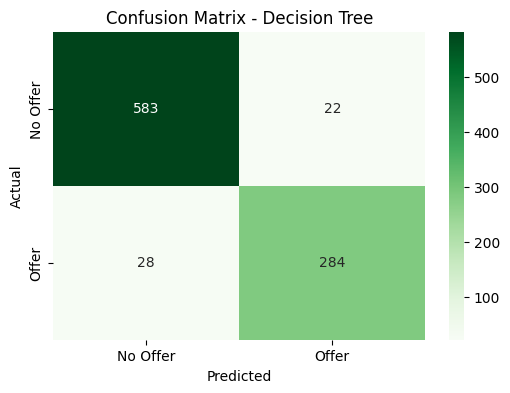

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Accuracy: 0.9018538713195202
Confusion Matrix:
 [[587  18]
 [ 72 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       605
           1       0.93      0.77      0.84       312

    accuracy                           0.90       917
   macro avg       0.91      0.87      0.89       917
weighted avg       0.90      0.90      0.90       917



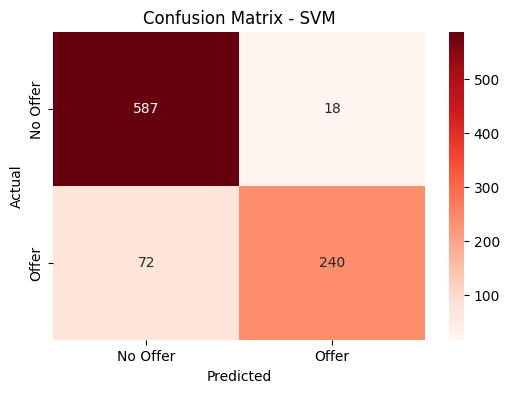

In [23]:
from sklearn.svm import SVC
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)

# Plot Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Offer', 'Offer'], yticklabels=['No Offer', 'Offer'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_2465/738728557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette='viridis')


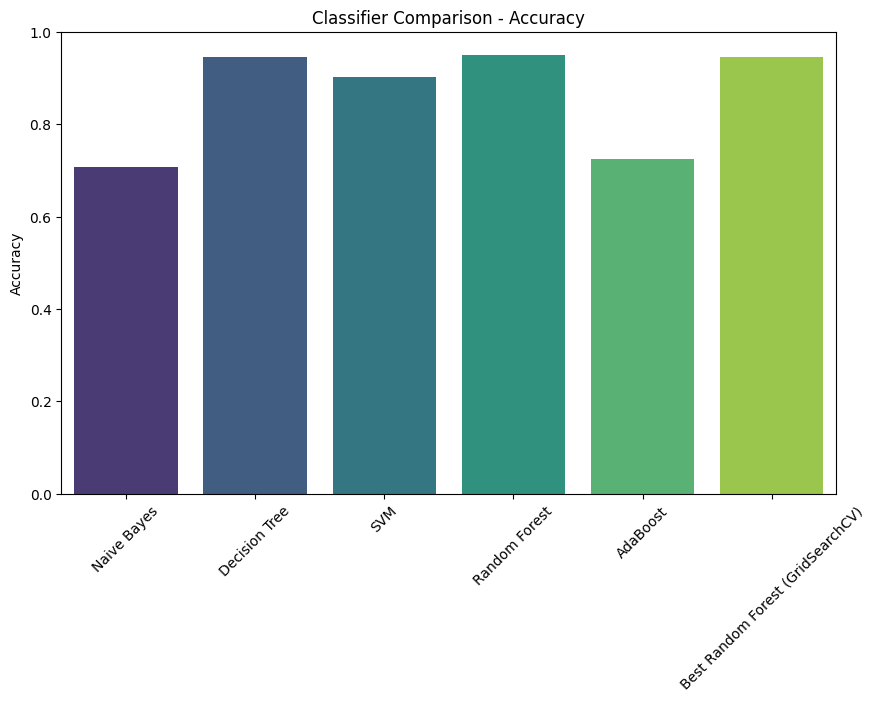

In [31]:
# Compare the performance of all classifiers
classifiers = ['Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest', 'AdaBoost', 'Best Random Forest (GridSearchCV)']
accuracies = [accuracy_nb, accuracy_dt, accuracy_svm, accuracy_rf, accuracy_ada, accuracy_best_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()